<a href="https://colab.research.google.com/github/BitKnitting/FitHome_Analysis/blob/master/notebooks/heater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microwave
This notebook explores microwave readings made with a TP-Link HS110

In [0]:
!curl 'https://fithome-9ebbd.firebaseio.com/flower-09282019/device_readings/microwave.json?print=pretty' > fithome_flower-microwave-09282019.json  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9297k  100 9297k    0     0  1016k      0  0:00:09  0:00:09 --:--:-- 2558k


In [0]:
# @title Read JSON
# The file that was uploaded was named fithome_all.json
import pandas as pd

df_needs_reshape = pd.read_json("fithome_flower-microwave-09282019.json", "r", encoding="utf8")

In [0]:
# @title Reshape

df_reshaped = df_needs_reshape.T
df_reshaped.head()

I         P
2019-10-06 13:54:20  0.313622  0.599245
2019-10-06 13:54:21  0.313622  0.599245
2019-10-06 13:54:22  0.313622  0.599245
2019-10-06 13:54:23  0.313622  0.599245
2019-10-06 13:54:24  0.313400  0.621535

In [0]:
# The datetime is in UTC time.  We are in Kirkland, WA
df_reshaped.index = df_reshaped.index.tz_localize('UTC').tz_convert('US/Pacific')


In [0]:
# @title Start Date and End Data of Series
print('Start date: {}'.format(df_reshaped.index.min()))
print('End   date: {}'.format(df_reshaped.index.max()))
time_between = df_reshaped.index.max() - df_reshaped.index.min()
print('\n\nElapsed time: {}'.format(time_between))

Start date: 2019-10-06 06:54:20-07:00
End   date: 2019-10-16 10:33:36-07:00


Elapsed time: 10 days 03:39:16


# Time Between Readings


In [0]:
df_reshaped.index.to_series().diff().tail(30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  """Entry point for launching an IPython kernel.


2019-10-16 10:32:38-07:00   00:00:02
2019-10-16 10:32:40-07:00   00:00:02
2019-10-16 10:32:42-07:00   00:00:02
2019-10-16 10:32:44-07:00   00:00:02
2019-10-16 10:32:46-07:00   00:00:02
2019-10-16 10:32:48-07:00   00:00:02
2019-10-16 10:32:50-07:00   00:00:02
2019-10-16 10:32:52-07:00   00:00:02
2019-10-16 10:32:54-07:00   00:00:02
2019-10-16 10:32:56-07:00   00:00:02
2019-10-16 10:32:58-07:00   00:00:02
2019-10-16 10:33:00-07:00   00:00:02
2019-10-16 10:33:02-07:00   00:00:02
2019-10-16 10:33:04-07:00   00:00:02
2019-10-16 10:33:06-07:00   00:00:02
2019-10-16 10:33:08-07:00   00:00:02
2019-10-16 10:33:10-07:00   00:00:02
2019-10-16 10:33:12-07:00   00:00:02
2019-10-16 10:33:14-07:00   00:00:02
2019-10-16 10:33:16-07:00   00:00:02
2019-10-16 10:33:18-07:00   00:00:02
2019-10-16 10:33:20-07:00   00:00:02
2019-10-16 10:33:22-07:00   00:00:02
2019-10-16 10:33:24-07:00   00:00:02
2019-10-16 10:33:26-07:00   00:00:02
2019-10-16 10:33:28-07:00   00:00:02
2019-10-16 10:33:30-07:00   00:00:02
2

In [0]:
# @title Interesting Data Stats
df_reshaped.describe()

I              P
count  151592.000000  151592.000000
mean        0.458292      17.029432
std         1.449562     164.536552
min         0.171379       0.000000
25%         0.312957       0.578077
50%         0.314190       0.607159
75%         0.315323       0.673764
max        16.766572    1854.714678

In [0]:
import plotly.graph_objects as go

In [0]:
# @title Interactive Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_reshaped.index,y=df_reshaped['P'],name='Power',line_color='deepskyblue'))
fig.update_layout(title_text='Power Readings',
                  xaxis_rangeslider_visible=True)
fig.show()

# Resample
The sample readings are not consistent.  Most are 4 seconds apart.  About 1/10th is 5 seconds apart.  Let's get all readings 5 seconds apart.

In [0]:
# Trying a daily resample.
df_5s = df_reshaped.resample(rule='5S').mean()
df_5s.head(30)

I          P
2019-10-02 13:35:50-07:00  4.321000  335.66490
2019-10-02 13:35:55-07:00  4.266000  334.75390
2019-10-02 13:36:00-07:00  4.253000  334.57370
2019-10-02 13:36:05-07:00  4.320000  333.43550
2019-10-02 13:36:10-07:00  3.901000  335.75755
2019-10-02 13:36:15-07:00  3.728000  335.72060
2019-10-02 13:36:20-07:00  3.725000  335.07710
2019-10-02 13:36:25-07:00  3.698000  332.65500
2019-10-02 13:36:30-07:00  3.717000  335.41935
2019-10-02 13:36:35-07:00  3.717000  337.11230
2019-10-02 13:36:40-07:00  3.740000  339.51170
2019-10-02 13:36:45-07:00  3.811000  344.62300
2019-10-02 13:36:50-07:00  3.693000  333.06180
2019-10-02 13:36:55-07:00  4.105500  341.88090
2019-10-02 13:37:00-07:00  5.100000  339.20350
2019-10-02 13:37:05-07:00  6.481000  336.01790
2019-10-02 13:37:10-07:00  6.882999  331.53440
2019-10-02 13:37:15-07:00  6.986500  338.29195
2019-10-02 13:37:20-07:00  7.143000  350.56890
2019-10-02 13:37:25-07:00  7.254000  367.24160
2019-10-02 13:37:30-07:00  7.220000  365.45600
2019-10-02 13:37:35-07:00  7.266000  368.82340
2019-10-02 13:37:40-07:00  7.251000  370.34845
2019-10-02 13:37:45-07:00  7.172000  359.82590
2019-10-02 13:37:50-07:00  7.286000  372.32250
2019-10-02 13:37:55-07:00  7.209000  359.58370
2019-10-02 13:38:00-07:00  7.234500  367.12940
2019-10-02 13:38:05-07:00  7.153000  353.15620
2019-10-02 13:38:10-07:00  7.168000  357.97470
2019-10-02 13:38:15-07:00  7.289001  370.01180

# kWh Per Hour
We have the samples in 5 second intervals.

Energy in kWh = sum(power)/1000 * T(5 seconds)/3600 (seconds/hour)

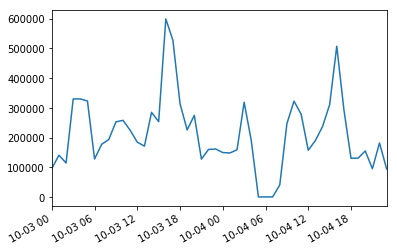

In [0]:
df_hourly = df_5s['2019-10-03':'2019-10-04'].resample(rule='h').sum()
df_hourly['P'].plot()

In [0]:
# @title Interactive Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_hourly.index,y=df_hourly['P'],name='Power',line_color='deepskyblue'))
fig.update_layout(title_text='Power Readings',
                  xaxis_rangeslider_visible=True)
fig.show()

In [0]:
df_hourly.loc['2019-10-03 16:00:00']

I      5709.5855
P    599465.7676
Name: 2019-10-03 16:00:00-07:00, dtype: float64

In [0]:
df_hourly.loc['2019-10-03 16:00:00']/1000*5/3600

I    0.007930
P    0.832591
Name: 2019-10-03 16:00:00-07:00, dtype: float64

In [0]:
.83*24

19.919999999999998

In [0]:
df_hourly = df_5s['2019-10-03':'2019-10-04'].resample(rule='h').apply(energy)
df_new.index.to_series().diff().head(30)

TypeError: ignored

In [0]:
df_new['2019-10-02 13:36:00':'2019-10-03 13:35:59']['P'].sum()/3600/1000

1.3994410544999998

0.23822964913252315

In [0]:
# @title Add up an hours worth of data
#df_one = df_reshaped.between_time('2019-10-04','2019-10-05')
df_reshaped['2019-10-02 14:00:00':'2019-10-02 15:00:00'].tail()



I         P
2019-10-02 14:59:42-07:00  3.432  278.4912
2019-10-02 14:59:46-07:00  3.461  280.5795
2019-10-02 14:59:50-07:00  3.445  279.1053
2019-10-02 14:59:54-07:00  3.435  278.2697
2019-10-02 14:59:58-07:00  3.446  279.3139

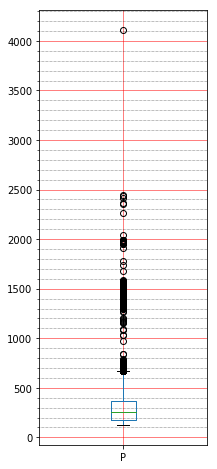

In [0]:
# @title Box Plot
ax = df_reshaped['P'].plot.box(figsize=(3,8))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

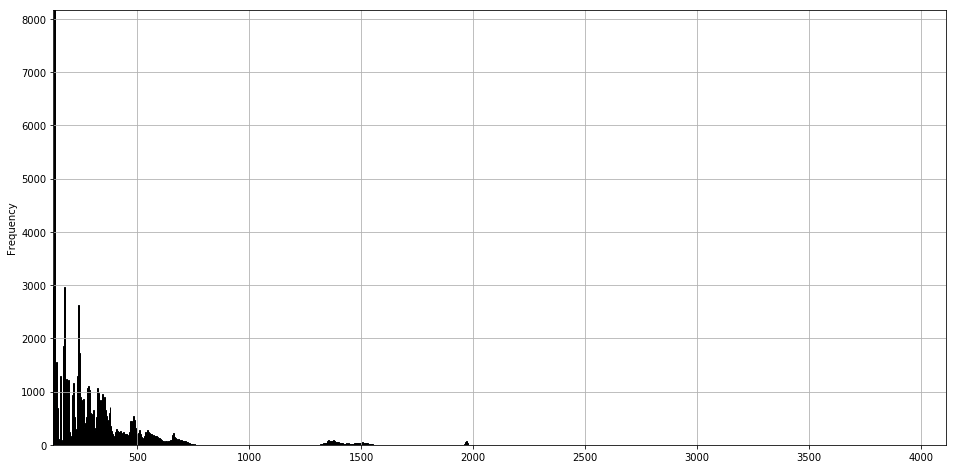

In [0]:
 # @title Histogram Distribution
 df_reshaped['P'].plot.hist(bins=1000, grid=True, edgecolor='k',figsize=(16,8)).autoscale(enable=True, axis='both', tight=True)


In [0]:
# @title Determine amount Leaking
df_bins = df_reshaped['P'].value_counts(bins=1000)
display(df_bins.head())
left_bin = df_bins.index[0].left
right_bin = df_bins.index[2].right

amount_leaking = (right_bin + left_bin) / 2
display(amount_leaking)

(128.609, 132.598]    8169
(120.631, 128.609]    2969
(172.483, 176.472]    2956
(236.299, 240.288]    2627
(168.495, 172.483]    1858
Name: P, dtype: int64

152.5405

In [0]:
# @title kWh
kwH = amount_leaking/1000*24*365
print('kwH in a year: {}'.format(kwH))
# .1036 / kWh in Kirkland
yearly_cost = kwH*.1036
print("yearly cost: ${}".format(yearly_cost))

kwH in a year: 1336.25478
yearly cost: $138.435995208




# Amount of Leaking Data
We estimate the amount of leaking electricity based on this dataset to be 152.5W

__TBD: How much is this as a percentage of total day?__